Sentiment Analysis for Steam Reviews
Steam is a video game digital distribution service with a vast community of gamers globally. A lot of gamers write reviews at the game page and have an option of choosing whether they would recommend this game to others or not. However, determining this sentiment automatically from text can help Steam to automatically tag such reviews extracted from other forums across the internet and can help them better judge the popularity of games.

Given the review text with user recommendation and other information related to each game for 64 game titles, the task is to predict whether the reviewer recommended the game titles available in the test set on the basis of review text and other information.

Game overview information for both train and test are available in single file game_overview.csv inside train.zip



About Data Source:
Steam Platform

#<font color='blue'>**Import Necessary Libraries**</font>

In [1]:
import sys
import nltk
import sklearn
import pandas
import numpy
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split 

print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
NLTK: 3.4.5
Scikit-learn: 0.21.3
Pandas: 0.25.1
Numpy: 1.16.5


<font size="5" color='blue'>Load DataSet</font>

In [2]:
import pandas as pd
import numpy as np

# load the dataset of SMS messages
df = pd.read_csv("train_janta.csv")
game=pd.read_csv("game_overview.csv")
test=pd.read_csv("test_janta.csv")

In [3]:

# print useful information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
review_id          17494 non-null int64
title              17494 non-null object
year               17316 non-null float64
user_review        17494 non-null object
user_suggestion    17494 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB
None
   review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I'm scared and hearing creepy voices.  So I'll...                1  
1  Best game, more better than Sam Pepper's YouTu...                1  
2  A littly iffy on the controls, but once you kn...                1  
3  Great gam

In [4]:

# print useful information about the dataset
print(game.info())
print(game.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
title        64 non-null object
developer    64 non-null object
publisher    64 non-null object
tags         64 non-null object
overview     64 non-null object
dtypes: object(5)
memory usage: 2.6+ KB
None
                              title                          developer  \
0       Spooky's Jump Scare Mansion                       Lag Studios    
1                    Sakura Clicker                      Winged Cloud    
2                           WARMODE                           WARTEAM    
3                   Fractured Space              Edge Case Games Ltd.    
4  Counter-Strike: Global Offensive  Valve, Hidden Path Entertainment    

               publisher                                               tags  \
0           Lag Studios   ['Horror', 'Free to Play', 'Cute', 'First-Pers...   
1          Winged Cloud   ['Nudity', 'Anime', 'Free to Play', 'Mature', ...   
2          

In [5]:

# print useful information about the dataset
print(test.info())
print(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8045 entries, 0 to 8044
Data columns (total 4 columns):
review_id      8045 non-null int64
title          8045 non-null object
year           7978 non-null float64
user_review    8045 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 251.5+ KB
None
   review_id                             title    year  \
0       1603  Counter-Strike: Global Offensive  2015.0   
1       1604  Counter-Strike: Global Offensive  2018.0   
2       1605  Counter-Strike: Global Offensive  2018.0   
3       1606  Counter-Strike: Global Offensive  2015.0   
4       1607  Counter-Strike: Global Offensive  2015.0   

                                         user_review  
0  Nice graphics, new maps, weapons and models. B...  
1  I would not recommend getting into this at its...  
2  Edit 11/12/18I have tried playing CS:GO recent...  
3  The game is great. But the community is the wo...  
4  I thank TrulyRazor for buying this for me a lo...  


In [6]:
# check usersuggestion distribution
classes = df['user_suggestion']
print(classes.value_counts())

1    9968
0    7526
Name: user_suggestion, dtype: int64


In [7]:
#check shape
print(df.shape)
print(game.shape)
print(test.shape)

(17494, 5)
(64, 5)
(8045, 4)


In [8]:
df.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


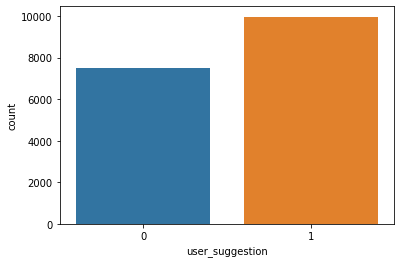

In [9]:
sns.countplot(df['user_suggestion'])

In [10]:
#Checking title distributions
df['title'].value_counts()

Robocraft                                             842
Eternal Card Game                                     791
Heroes & Generals                                     745
War Thunder                                           720
Fractured Space                                       718
Bless Online                                          712
The Elder Scrolls®: Legends™                          565
Neverwinter                                           546
AdventureQuest 3D                                     519
theHunter Classic                                     518
Creativerse                                           492
DCS World Steam Edition                               488
Team Fortress 2                                       479
Infestation: The New Z                                479
PlanetSide 2                                          472
Path of Exile                                         458
SMITE®                                                454
Fallout Shelte

In [11]:
#Checking year distributions
df['year'].value_counts()

2018.0    4822
2016.0    4226
2017.0    3890
2015.0    2460
2014.0    1499
2013.0     340
2012.0      65
2011.0      14
Name: year, dtype: int64

In [12]:
game.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [13]:
game['title'].value_counts()

Bless Online                        1
Fishing Planet                      1
Spooky's Jump Scare Mansion         1
Counter-Strike: Global Offensive    1
Tactical Monsters Rumble Arena      1
                                   ..
World of Guns: Gun Disassembly      1
H1Z1                                1
Heroes & Generals                   1
The Elder Scrolls®: Legends™        1
Neverwinter                         1
Name: title, Length: 64, dtype: int64

In [14]:
test.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [15]:
test['title'].value_counts()

Magic Duels                         893
Tree of Savior (English Ver.)       635
Star Trek Online                    566
Dungeon Defenders II                554
Paladins®                           529
Fishing Planet                      498
Counter-Strike: Global Offensive    463
Shadowverse CCG                     450
The Lord of the Rings Online™       439
H1Z1                                425
Minion Masters                      401
Champions Online                    383
World of Warships                   366
Crush Crush                         333
Aura Kingdom                        324
Digimon Masters Online              310
VEGA Conflict                       173
Shakes and Fidget                   137
Governor of Poker 3                  89
GUNS UP!                             77
Name: title, dtype: int64

In [16]:
dist_keyword=df['title'].value_counts()
dist_keyword

Robocraft                                             842
Eternal Card Game                                     791
Heroes & Generals                                     745
War Thunder                                           720
Fractured Space                                       718
Bless Online                                          712
The Elder Scrolls®: Legends™                          565
Neverwinter                                           546
AdventureQuest 3D                                     519
theHunter Classic                                     518
Creativerse                                           492
DCS World Steam Edition                               488
Team Fortress 2                                       479
Infestation: The New Z                                479
PlanetSide 2                                          472
Path of Exile                                         458
SMITE®                                                454
Fallout Shelte

In [17]:
bool_series_location = pd.isnull(df['title']) 

# filtering data  
# displaying data only with location = NaN  
df[bool_series_location]
print("Number of records with missing location",len(df[bool_series_location]))

Number of records with missing location 0


In [18]:
bool_series_location = pd.isnull(df['user_review']) 

# filtering data  
# displaying data only with location = NaN  
df[bool_series_location]
print("Number of records with missing location",len(df[bool_series_location]))

Number of records with missing location 0


In [19]:
bool_series_location = pd.isnull(df['year']) 

# filtering data  
# displaying data only with location = NaN  
df[bool_series_location]
print("Number of records with missing location",len(df[bool_series_location]))

Number of records with missing location 178


Year does not play a role in User suggestion and there are missing values so we can drop it

In [20]:

Y=df['user_suggestion']
X=df['user_review']

In [21]:
Y.shape

(17494,)

In [22]:
X.shape

(17494,)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [24]:
#Feature extraction in NLP

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Features= count_vect.fit_transform(X_train)

In [25]:
Features.shape

(12245, 44382)

In [26]:
#Build a model
from sklearn import svm
model=svm.SVC(kernel='linear',C=10,gamma='auto')
model.fit(Features,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
Feature_test=count_vect.transform(X_test)
Feature_testa=count_vect.transform(test['user_review'])

In [28]:
Feature_test.shape


(5249, 44382)

In [29]:
Feature_testa.shape

(8045, 44382)

In [30]:
print("Accuracy of model",model.score(Feature_test,y_test))

Accuracy of model 0.8146313583539722


In [31]:

Predictions=model.predict(Feature_testa)


In [32]:
Predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
user_suggestion=pd.DataFrame(Predictions)

In [34]:
user_suggestion

,0
0,0
1,0
2,0
3,0
4,1
...,...
8040,1
8041,0
8042,1
8043,1


In [35]:
Final=test['review_id']

In [36]:
Final=pd.concat([test['review_id'],user_suggestion],axis=1)


In [37]:
Final.columns=['review_id','user_suggestion']

In [38]:
Final['user_suggestion'].value_counts()

1    4597
0    3448
Name: user_suggestion, dtype: int64

In [52]:
Final.to_csv('Submission_3.csv',index=False)

In [40]:
from xgboost import XGBClassifier

In [91]:


# fit model no training data
model = XGBClassifier(learning_rate =0.1,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(Features,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=3000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.85,
              tree_method=None, validate_parameters=False, verbosity=None)

In [92]:


# make predictions for test data
y_pred = model.predict(Feature_testa)


In [93]:
print("Accuracy of model",model.score(Feature_test,y_test))

Accuracy of model 0.855210516288817


In [89]:
user_suggestion=pd.DataFrame(y_pred)

In [90]:
Final=test['review_id']
Final=pd.concat([test['review_id'],user_suggestion],axis=1)
Final.columns=['review_id','user_suggestion']
Final.to_csv('Submission_6.csv',index=False)

In [62]:
Y=df['user_suggestion']
X_pro=df['user_review']

In [63]:
Y.shape

(17494,)

In [64]:
X.shape

(17494,)

In [55]:
#Text Cleaning

In [71]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
processed = X.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [72]:
# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [73]:

# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()
print(processed)



0        i m scared and hearing creepy voices so i ll p...
1        best game more better than sam pepper s youtub...
2        a littly iffy on the controls but once you kno...
3        great game fun and colorful and all that a sid...
4        not many games have the cute tag right next to...
                               ...                        
17489    arguably the single greatest mmorp that exists...
17490    an older game to be sure but has its own charm...
17491    when i frist started playing everquest numbr i...
17492    cool game the only thing that really pisses me...
17493    this game since i was a little kid always have...
Name: user_review, Length: 17494, dtype: object


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed, Y, test_size=0.30 , random_state=1)

In [75]:
#Feature extraction in NLP

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Featureset= count_vect.fit_transform(X_train)

In [76]:
Featureset.shape

(12245, 42632)

In [43]:
Featureset_test=count_vect.fit_transform(test['user_review'])


In [45]:
Featureset_test.shape

(8045, 34285)

In [46]:
Featuresseta= count_vect.fit_transform(X_test)

In [147]:
Featuresseta.shape

(5249, 25973)

In [47]:
#Build a model
from sklearn import svm
models=svm.SVC()
models.fit(Featureset,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
Predictions

In [ ]:
user_suggestions=pd.DataFrame(Predictions)

In [ ]:
Finall=test['review_id']

In [ ]:
Finall=pd.concat([test['review_id'],user_suggestions],axis=1)

In [ ]:
Finall.columns=['review_id','user_suggestion']

In [ ]:
Finall['user_suggestion'].value_counts()

In [ ]:
print("Accuracy of model",model.score(Featureset_test,y_test))


Approach : Use K Fold Cross validation
Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:

cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),Features,y_train, cv=5)

array([0.80971825, 0.81339322, 0.80890159, 0.81461821, 0.79828501])

In [94]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),Features,y_train, cv=5)

array([0.72886893, 0.72601062, 0.71376072, 0.72192732, 0.71335239])

In [95]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),Features,y_train, cv=5)

array([0.7762352 , 0.7721519 , 0.77705186, 0.7680686 , 0.76970192])


Approach 3: Use GridSearchSV
GridSearchCV does exactly same thing as for loop above but in a single line of code

In [46]:

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(Features,y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,0.807350
1,10,linear,0.808983


In [47]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}



In [50]:
scores = []

for model_name, mp in model_params.items():
    rs = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    rs.fit(Features,y_train)
    scores.append({
        'model': model_name,
        'best_score': rs.best_score_,
        'best_params': rs.best_params_
    })
    
dfa = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dfa

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conver

,model,best_score,best_params
0,svm,0.816742,"{'kernel': 'linear', 'C': 1}"
1,random_forest,0.727072,{'n_estimators': 10}
2,logistic_regression,0.839608,{'C': 1}


From here i can see logistic regression is having a score near to 83%

In [51]:
#Lets try ensemble methods to increase performance

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(Features,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
# make predictions for test data
y_pred = dt.predict(Feature_testa)

In [53]:
print("Accuracy of model",model.score(Feature_test,y_test))

Accuracy of model 0.8294913316822252


In [56]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(Features,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [61]:
# make predictions for test data
y_pred = bg.predict(Feature_testa)
print("Accuracy of model",bg.score(Feature_test,y_test))

Accuracy of model 0.7527148028195847


In [58]:
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [59]:

#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(Features,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [60]:
y_pred = adb.predict(Feature_testa)
print("Accuracy of model",adb.score(Feature_test,y_test))

Accuracy of model 0.6963231091636503


In [64]:
# Voting Classifier - Multiple Model Ensemble 
from sklearn import svm
lr = LogisticRegression()
dt = DecisionTreeClassifier()


In [65]:

evc = VotingClassifier( estimators= [('lr',lr),('dt',dt)], voting = 'hard')

In [66]:
evc.fit(Features,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                           

In [67]:
print("Accuracy of model",evc.score(Feature_test,y_test))

Accuracy of model 0.7550009525623929
